# 0. Introdução

**Trabalho Clustering**:

Aluno: Gabriel Luiz

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois datasets rotulados.
- Realize a análise estatística, visualização e pré-processamento dos dados.
- Realize os experimentos criando duas bases de teste distintas:
- - considerando todos os atributos do dataset ;
- - selecionando alguns atributos e descartando outros;
- Aplique três métodos de clustering distintos nas duas bases acima.
- Para cada dataset , em cada uma das bases, analise os resultados
 segundo medidas de qualidade de clustering , usando índices de
 validação interna (SSW, SSB, silhueta, Calinski-Harabasz, Dunn e
 Davis-Bouldin) e externa (pureza, entropia, acurácia, F-measure ,
 ARI, NMI).
- Proponha uma maneira adicional de comparar os resultados obtidos
além das medidas acima.
- Compare e interprete os resultados dos dois experimentos em cada dataset


## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [1]:
from datetime import datetime
import pandas as pd
from sklearn.cluster import *
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 1. Dados

Para realização das tarefas envolvidas neste relatório utilizou-se o arquivo **kaggle_Interests_group.csv** que contém dados de interesses de pessoas e foram classificadas em quatro grupos.

/////////////////////////////////////////////////O objetivo da pesquisa foi estudar qual a relação das pessoas que possuem corona virus com suas informações pessoais. As informações coletadas incluíam **idade**, **sexo (masculino = 0, feminino = 1)**, **data inicio sintomas**, **data entrada no hospital** e **data de confirmação da doença**.//////////////////////////////////////////////////

## 1.1 Informações sobre os dados:

#### Atributos:
- Quantidade de registros 6000 pessoas
- 4 grupos de pessoas
- 217 questões sobre interesses. Exemplo: Voce gosta de jogar xadrez? (S/N)

## 1.2 Carregamento do arquivo

In [2]:
dataset = './dataset/kaggle_Interests_group.csv'

In [3]:
# Carregando os dados apenas com as colunas desejadas
interests = pd.read_csv(
    dataset,
    )

In [4]:
interests.head()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [5]:
interests.describe()

,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
count,6340.000000,993.0,1.0,35.0,25.0,798.000000,3394.000000,1.0,93.0,333.000000,...,118.000000,110.0,5037.000000,2474.000000,877.000000,2.0,72.0,4943.000000,4058.000000,147.0
mean,37.312303,1.0,1.0,1.0,1.0,1.001253,1.000589,1.0,1.0,1.003003,...,1.008475,1.0,1.000596,1.000808,1.002281,1.0,1.0,1.000202,1.000246,1.0
std,15.729872,0.0,NaN,0.0,0.0,0.035400,0.024271,NaN,0.0,0.054800,...,0.092057,0.0,0.024400,0.028427,0.047727,0.0,0.0,0.014223,0.015698,0.0
min,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
25%,28.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
50%,39.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
75%,48.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
max,104.000000,1.0,1.0,1.0,1.0,2.000000,2.000000,1.0,1.0,2.000000,...,2.000000,1.0,2.000000,2.000000,2.000000,1.0,1.0,2.000000,2.000000,1.0


# 2. Pré-processamento

#### Problemas idenficados:
- 1. Dados faltantes representados por "NaN"

In [6]:
interests.isna().sum()

group                     0
grand_tot_interests       0
interest1              5347
interest2              6339
interest3              6305
                       ... 
interest213            6338
interest214            6268
interest215            1397
interest216            2282
interest217            6193
Length: 219, dtype: int64

In [7]:
for col in interests:
    print(col, interests[col].unique())


group ['C' 'P' 'R' 'I']
grand_tot_interests [ 17  43  27  34  36   6  54   2  29  44  39  28  47  38  37  11  71  48
   4   1  60  23  24  45  30  51  22   8  10  57  26  41  13  46  31  25
  62  32  56  42  49  55   3  66  58  21  70  35  61  40  63  69  52  59
  50  33   9  53  65  64  18  15  20  19  16  81  75  14  12  73  97   7
  76  74   5  68  89  67  80 104  84  82  77  72  99]
interest1 [nan  1.]
interest2 [nan  1.]
interest3 [nan  1.]
interest4 [nan  1.]
interest5 [nan  1.  2.]
interest6 [nan  1.  2.]
interest7 [nan  1.]
interest8 [nan  1.]
interest9 [nan  1.  2.]
interest10 [nan  1.]
interest11 [nan  1.]
interest12 [ 1. nan  2.]
interest13 [nan  1.]
interest14 [nan  1.]
interest15 [nan  1.]
interest16 [ 1. nan  2.]
interest17 [nan  1.]
interest18 [nan  1.]
interest19 [nan  1.]
interest20 [nan  1.]
interest21 [ 1. nan  2.]
interest22 [nan  1.]
interest23 [nan  1.]
interest24 [nan  1.]
interest25 [nan  1.]
interest26 [nan  1.]
interest27 [nan  1.]
interest28 [nan  1.]
interes

## 2.1 Removendo registros NaN

Como o dataset utiliza de NaN para zeros e também para valores nao preenchidos, irei preencher apenas os valores que realmente são 0

In [8]:
a=[]
for col in interests:
    if interests[col].nunique()==1:
        a.append(col)
    else:
        pass
interests[a] = interests[a].fillna(0)

In [9]:
for col in interests:
    print(col, interests[col].unique())

group ['C' 'P' 'R' 'I']
grand_tot_interests [ 17  43  27  34  36   6  54   2  29  44  39  28  47  38  37  11  71  48
   4   1  60  23  24  45  30  51  22   8  10  57  26  41  13  46  31  25
  62  32  56  42  49  55   3  66  58  21  70  35  61  40  63  69  52  59
  50  33   9  53  65  64  18  15  20  19  16  81  75  14  12  73  97   7
  76  74   5  68  89  67  80 104  84  82  77  72  99]
interest1 [0. 1.]
interest2 [0. 1.]
interest3 [0. 1.]
interest4 [0. 1.]
interest5 [nan  1.  2.]
interest6 [nan  1.  2.]
interest7 [0. 1.]
interest8 [0. 1.]
interest9 [nan  1.  2.]
interest10 [0. 1.]
interest11 [0. 1.]
interest12 [ 1. nan  2.]
interest13 [0. 1.]
interest14 [0. 1.]
interest15 [0. 1.]
interest16 [ 1. nan  2.]
interest17 [0. 1.]
interest18 [0. 1.]
interest19 [0. 1.]
interest20 [0. 1.]
interest21 [ 1. nan  2.]
interest22 [0. 1.]
interest23 [0. 1.]
interest24 [0. 1.]
interest25 [0. 1.]
interest26 [0. 1.]
interest27 [0. 1.]
interest28 [0. 1.]
interest29 [0. 1.]
interest30 [0. 1.]
interest31 [0

Após preencher os valores "0" sobrou NaN apenas em colunas onde os valores possiveis são [nan  1.  2.]
removo essas colunas visto que a definição do dataset são perguntas apenas de verdadeiro e falso

In [10]:
b=[]
for col in interests:
    if interests[col].isnull().sum()>0:
        b.append(col)
    else:
        pass
interests=interests.drop(b,axis=1)

In [11]:
for col in interests:
    print(col, interests[col].unique())

group ['C' 'P' 'R' 'I']
grand_tot_interests [ 17  43  27  34  36   6  54   2  29  44  39  28  47  38  37  11  71  48
   4   1  60  23  24  45  30  51  22   8  10  57  26  41  13  46  31  25
  62  32  56  42  49  55   3  66  58  21  70  35  61  40  63  69  52  59
  50  33   9  53  65  64  18  15  20  19  16  81  75  14  12  73  97   7
  76  74   5  68  89  67  80 104  84  82  77  72  99]
interest1 [0. 1.]
interest2 [0. 1.]
interest3 [0. 1.]
interest4 [0. 1.]
interest7 [0. 1.]
interest8 [0. 1.]
interest10 [0. 1.]
interest11 [0. 1.]
interest13 [0. 1.]
interest14 [0. 1.]
interest15 [0. 1.]
interest17 [0. 1.]
interest18 [0. 1.]
interest19 [0. 1.]
interest20 [0. 1.]
interest22 [0. 1.]
interest23 [0. 1.]
interest24 [0. 1.]
interest25 [0. 1.]
interest26 [0. 1.]
interest27 [0. 1.]
interest28 [0. 1.]
interest29 [0. 1.]
interest30 [0. 1.]
interest31 [0. 1.]
interest32 [0. 1.]
interest33 [0. 1.]
interest34 [0. 1.]
interest35 [0. 1.]
interest36 [0. 1.]
interest38 [0. 1.]
interest39 [0. 1.]
interest

Após este passo realizo a discretização da variavel do grupo das pessoas

In [12]:
interests['group'] = interests['group'].map({'C':0,'P':1,'R':2,'I':3})

### Neste momento os dados estão pré-processados

In [13]:
interests.describe()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest7,interest8,interest10,interest11,...,interest198,interest199,interest201,interest203,interest206,interest207,interest209,interest213,interest214,interest217
count,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,...,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000
mean,1.468139,37.312303,0.156625,0.000158,0.005521,0.003943,0.000158,0.014669,0.000158,0.027603,...,0.002524,0.005836,0.263565,0.004101,0.001104,0.000158,0.017350,0.000315,0.011356,0.023186
std,1.167915,15.729872,0.363475,0.012559,0.074101,0.062676,0.012559,0.120233,0.012559,0.163844,...,0.050177,0.076176,0.440601,0.063912,0.033212,0.012559,0.130583,0.017760,0.105968,0.150506
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,104.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data =  interests.drop(columns=['grand_tot_interests'])
data_x = data.drop(columns=['group'])
data_y = data.group

### 2.2 Análise estatística

### 2.5 Escalonando

Para aplicação dos algoritmos escalona-se os dados afim de parametriza-los num certo intervalor (-1 a 1)

In [15]:
scaler = preprocessing.StandardScaler()
data_scaler = scaler.fit_transform(X = data_x)

In [16]:
data_scaler

array([[-0.4309427 , -0.01256   , -0.07450604, ..., -0.01776392,
        -0.10717704, -0.15406647],
       [ 2.3204941 , -0.01256   , -0.07450604, ..., -0.01776392,
        -0.10717704, -0.15406647],
       [-0.4309427 , -0.01256   , -0.07450604, ..., -0.01776392,
        -0.10717704, -0.15406647],
       ...,
       [-0.4309427 , -0.01256   , -0.07450604, ..., -0.01776392,
        -0.10717704, -0.15406647],
       [-0.4309427 , -0.01256   , -0.07450604, ..., -0.01776392,
        -0.10717704, -0.15406647],
       [ 2.3204941 , -0.01256   , -0.07450604, ..., -0.01776392,
        -0.10717704, -0.15406647]])

In [17]:
data_scaled = pd.DataFrame(data_scaler)
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,-0.430943,-0.01256,-0.074506,-0.062919,-0.01256,-0.122013,-0.01256,-0.168482,-0.053359,-0.24716,...,-0.0503,-0.076617,-0.598241,-0.06417,-0.033246,-0.01256,-0.132878,-0.017764,-0.107177,-0.154066
1,2.320494,-0.01256,-0.074506,-0.062919,-0.01256,-0.122013,-0.01256,-0.168482,-0.053359,-0.24716,...,-0.0503,-0.076617,1.671567,-0.06417,-0.033246,-0.01256,-0.132878,-0.017764,-0.107177,-0.154066
2,-0.430943,-0.01256,-0.074506,-0.062919,-0.01256,-0.122013,-0.01256,-0.168482,-0.053359,-0.24716,...,-0.0503,-0.076617,-0.598241,-0.06417,-0.033246,-0.01256,-0.132878,-0.017764,-0.107177,-0.154066
3,-0.430943,-0.01256,-0.074506,-0.062919,-0.01256,-0.122013,-0.01256,-0.168482,-0.053359,-0.24716,...,-0.0503,-0.076617,1.671567,-0.06417,-0.033246,-0.01256,-0.132878,-0.017764,-0.107177,-0.154066
4,-0.430943,-0.01256,-0.074506,-0.062919,-0.01256,-0.122013,-0.01256,5.935366,-0.053359,-0.24716,...,-0.0503,-0.076617,-0.598241,-0.06417,-0.033246,-0.01256,-0.132878,-0.017764,-0.107177,-0.154066


#### 2.2.1 Correlação

Por correlação é possivel observar que há atributos com alguma correlação significante

In [18]:
interests.corr()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest7,interest8,interest10,interest11,...,interest198,interest199,interest201,interest203,interest206,interest207,interest209,interest213,interest214,interest217
group,1.000000,0.120932,0.035726,0.016475,-0.020753,-0.010136,-0.005035,0.021865,-0.015790,-0.005708,...,-0.057851,0.001204,0.406732,-0.004590,-0.009260,0.005720,-0.065679,0.000485,-0.107971,-0.035734
grand_tot_interests,0.120932,1.000000,0.196809,0.026103,0.067274,0.125960,0.014923,0.149472,0.022908,0.148578,...,0.068557,0.081816,0.360916,0.097741,0.059431,0.049260,0.076006,0.004730,0.081629,0.107488
interest1,0.035726,0.196809,1.000000,0.029145,0.026463,0.035208,0.029145,0.019615,-0.005413,0.022756,...,-0.013026,0.012562,0.037708,0.033463,-0.001259,0.029145,0.019182,0.016783,-0.001134,-0.002952
interest2,0.016475,0.026103,0.029145,1.000000,0.168577,-0.000790,-0.000158,-0.001532,-0.000158,-0.002116,...,-0.000632,-0.000962,0.020995,-0.000806,-0.000418,-0.000158,-0.001669,-0.000223,-0.001346,-0.001935
interest3,-0.020753,0.067274,0.026463,0.168577,1.000000,0.029279,-0.000936,0.008616,-0.000936,0.026428,...,0.038681,0.022239,0.023073,0.028529,0.061623,0.168577,0.022706,-0.001324,0.032195,0.002666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
interest207,0.005720,0.049260,0.029145,-0.000158,0.168577,0.199621,-0.000158,-0.001532,-0.000158,-0.002116,...,-0.000632,-0.000962,-0.007514,0.195729,0.377786,1.000000,-0.001669,-0.000223,-0.001346,-0.001935
interest209,-0.065679,0.076006,0.019182,-0.001669,0.022706,-0.008361,-0.001669,0.013931,-0.001669,0.051346,...,0.185928,0.021537,0.019215,0.010375,0.031957,-0.001669,1.000000,-0.002360,0.111162,-0.012445
interest213,0.000485,0.004730,0.016783,-0.000223,-0.001324,-0.001118,-0.000223,-0.002167,-0.000223,-0.002993,...,-0.000894,-0.001361,-0.010627,-0.001140,-0.000591,-0.000223,-0.002360,1.000000,-0.001904,-0.002737
interest214,-0.107971,0.081629,-0.001134,-0.001346,0.032195,0.017009,-0.001346,0.011686,-0.001346,0.072803,...,0.202292,0.011331,-0.010057,-0.006878,-0.003563,-0.001346,0.111162,-0.001904,1.000000,-0.006621


### 2.3 Plotando boxsplot

Pelo boxsplot é possivel visualizar que há diversos outliers. Adiante os atributos com outliers serão removidos para aplicar os algoritmos pela 2ª vez.

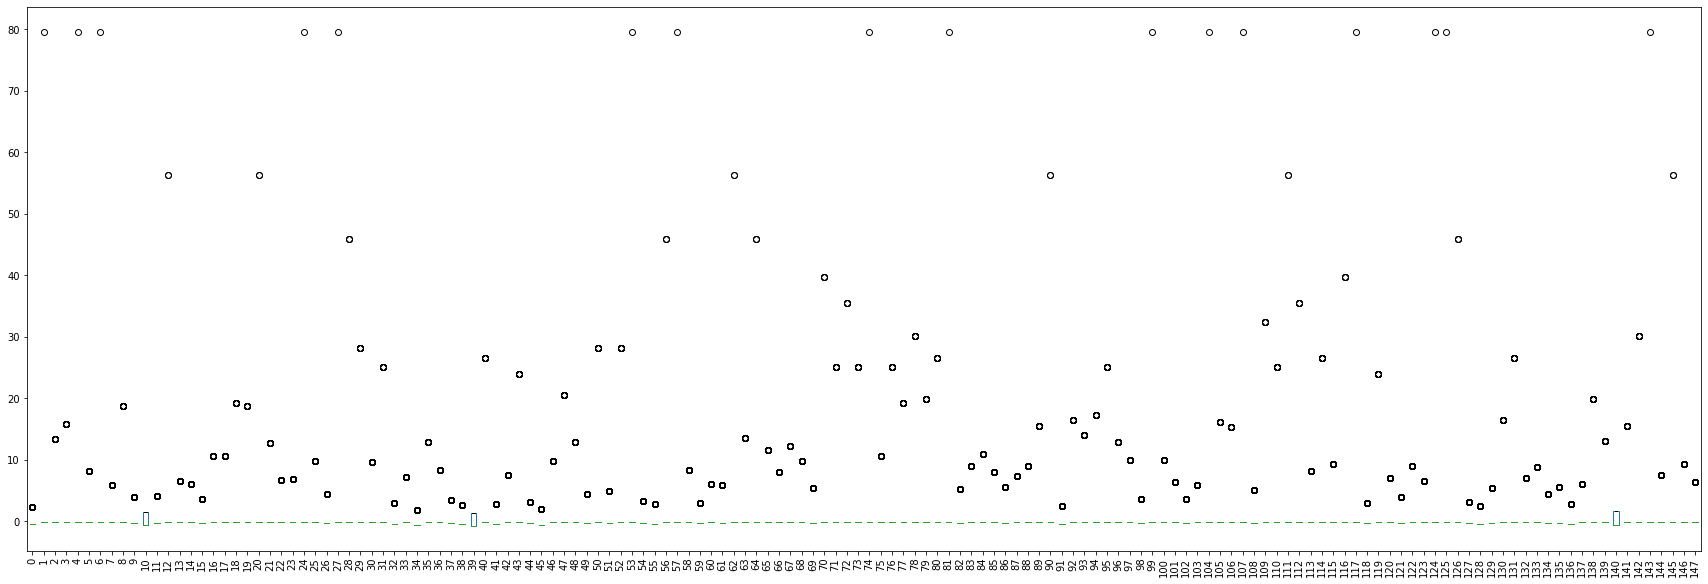

In [19]:
data_scaled.plot(kind = 'box', figsize=(30,10), rot=90, )

# 3. Clustering

## 3.1 Dataset Completo

### 3.1.1 K-Means

In [20]:
data_kmeans = data_scaled.copy()

In [21]:
kmeans = KMeans(n_clusters = 4, init = 'random')
kmeans.fit(data_kmeans)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

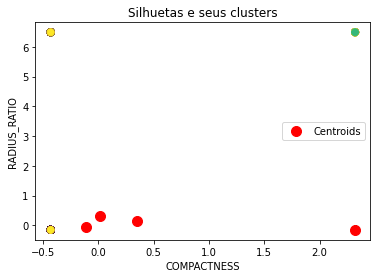

In [22]:
plt.scatter(data_scaler[:,0], data_scaler[:,147], s = 50, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 147], s = 100, c = 'red',label = 'Centroids')
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.legend()
plt.show()